Epoch: 0050 cost= 0.329606324 W= 0.530512 b= -1.21944
Epoch: 0100 cost= 0.300428629 W= 0.513805 b= -1.09925
Epoch: 0150 cost= 0.274619013 W= 0.498091 b= -0.986205
Epoch: 0200 cost= 0.251789898 W= 0.483312 b= -0.879885
Epoch: 0250 cost= 0.231596306 W= 0.469411 b= -0.779887
Epoch: 0300 cost= 0.213734746 W= 0.456338 b= -0.685837
Epoch: 0350 cost= 0.197935507 W= 0.444042 b= -0.59738
Epoch: 0400 cost= 0.183960959 W= 0.432477 b= -0.514185
Epoch: 0450 cost= 0.171600178 W= 0.4216 b= -0.435938
Epoch: 0500 cost= 0.160666719 W= 0.41137 b= -0.362343
Epoch: 0550 cost= 0.150995955 W= 0.401749 b= -0.293126
Epoch: 0600 cost= 0.142442212 W= 0.392699 b= -0.228026
Epoch: 0650 cost= 0.134876385 W= 0.384188 b= -0.166797
Epoch: 0700 cost= 0.128184468 W= 0.376183 b= -0.10921
Epoch: 0750 cost= 0.122265480 W= 0.368654 b= -0.0550475
Epoch: 0800 cost= 0.117030293 W= 0.361573 b= -0.00410655
Epoch: 0850 cost= 0.112399898 W= 0.354913 b= 0.0438047
Epoch: 0900 cost= 0.108304471 W= 0.348649 b= 0.0888665
Epoch: 0950 co

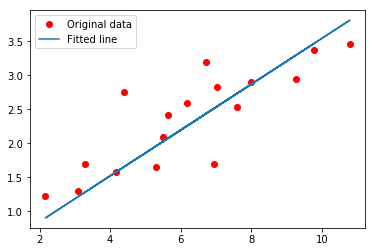

Testing... (Mean square loss Comparison)
Testing cost= 0.0890009
Absolute mean square loss difference: 0.0124776


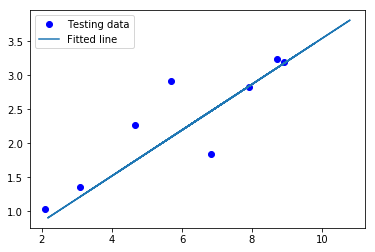

In [3]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
                            tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
                            feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost))


    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


